In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
f_mean = 20
f_peak = 152.8
f_base = 5
sigma_stim = 2

In [3]:

def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    if delta[0] > grid[0] * .5 and grid[0] > 0:
        delta[0] -= grid[0]

    if delta[1] > grid[1] * .5 and grid[1] > 0:
        delta[1] -= grid[1]

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))

def generate_rates(s, grid=np.asarray([16, 16]), f_base=5., f_peak=152.8, sigma_stim=2.):
    ''' 
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.empty(grid)
    for x in range(grid[0]):
        for y in range(grid[1]):
            _d = distance(s, (x, y), grid)
            _rates[x, y] = f_base + (f_peak * (np.exp(
                (-_d * 2) / (sigma_stim ** 2))))
    return _rates

def generate_gaussian_rates(s, grid=np.asarray([16, 16]), f_base=5., f_peak=152.8, sigma_stim=2.):
    ''' 
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.empty(grid)
    for x in range(grid[0]):
        for y in range(grid[1]):
            _d = distance(s, (x, y), grid)
            _rates[x, y] = f_base + (f_peak * (np.exp(
                (-_d**2 ) / (sigma_stim ** 2* 2))))
    return _rates

def generate_multimodal_gaussian_rates(s, grid, f_base=5, f_peak=152.8, sigma_stim=2):
    '''
    Function that generates an array the same shape as the input layer so that
    each cell has a value corresponding to the firing rate for the neuron
    at that position.
    '''
    _rates = np.zeros(grid)
    for pos in s:
        for x in range(grid[0]):
            for y in range(grid[1]):
                _d = distance(pos, (x, y), grid)
                _rates[x, y] += (f_peak * (np.exp(
                    (-_d ** 2) / (sigma_stim ** 2 * 2))))

    for x in range(grid[0]):
        for y in range(grid[1]):
            _rates[x, y] += f_base
    return _rates

In [41]:
rates = generate_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

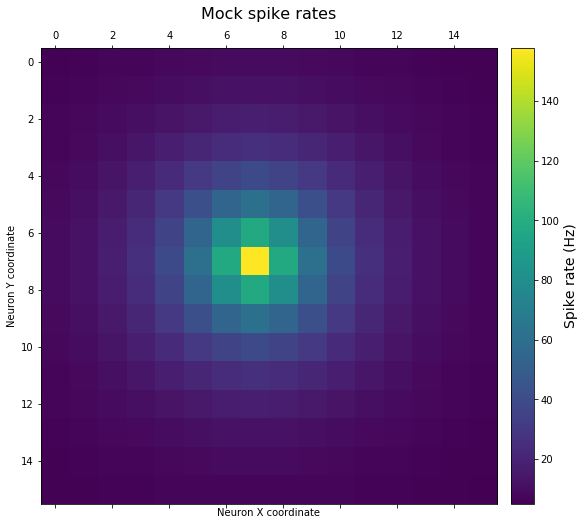

In [42]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(rates, vmin=5, vmax=f_peak+f_base)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

In [43]:
np.mean(rates)

19.066936910399001

In [44]:
np.max(rates)

157.80000000000001

In [45]:
assert np.max(rates) == f_peak + f_base, np.max(rates)

In [46]:
assert np.isclose(np.average(rates), f_mean, 0.1, 0.1), np.average(rates)

In [24]:
rates_mm = generate_multimodal_gaussian_rates([[4,4],[11,11]], [16,16],
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

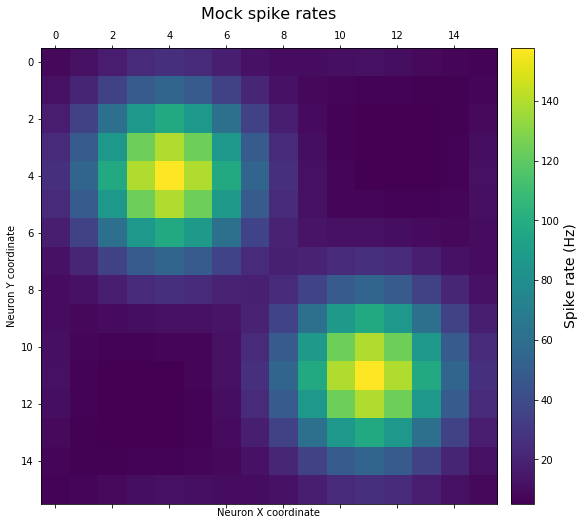

In [25]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(rates_mm)
ax1.grid(visible=False)
ax1.set_title("Mock spike rates", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spike rate (Hz)", fontsize=14)
plt.tight_layout(.3)

In [26]:
np.mean(rates_mm)

34.997139705142722

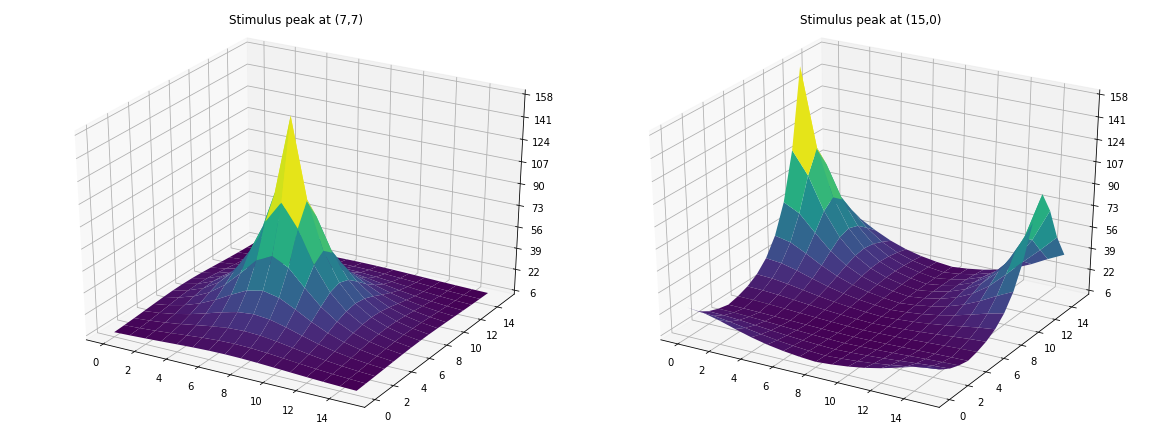

In [8]:
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = generate_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.7)

ax.set_title("Stimulus peak at (7,7)\n")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2 = fig.gca(projection='3d')
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

rates2 = generate_rates([12,0], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

surf2 = ax2.plot_surface(X, Y, rates2, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.7)
ax2.set_title("Stimulus peak at (15,0)\n")
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.xaxis.set_major_locator(LinearLocator(8))
# ax.yaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# ax2.xaxis.set_major_locator(LinearLocator())
# ax2.yaxis.set_major_locator(LinearLocator(8))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(surf2, cax=cax)
# cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
fig.savefig("3d_stimulus_location_pointy.png")


# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=10)

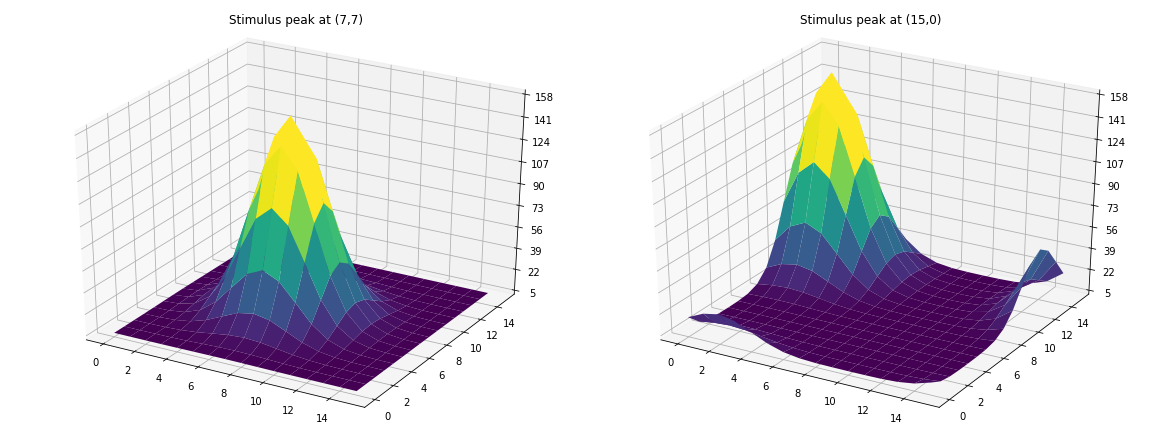

In [10]:
# fig = plt.figure(figsize=(12, 8), dpi=600)
fig = plt.figure(figsize=(16, 6), dpi=600)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')

rates = generate_gaussian_rates([7,7], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)
# Plot the surface.
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

surf = ax.plot_surface(X, Y, rates, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.7)

ax.set_title("Stimulus peak at (7,7)\n")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2 = fig.gca(projection='3d')
X, Y = np.meshgrid(np.arange(rates.shape[0]), np.arange(rates.shape[0]))

rates2 = generate_gaussian_rates([12,0], 
                           f_base=f_base,
                           f_peak=f_peak,
                           sigma_stim=sigma_stim)

surf2 = ax2.plot_surface(X, Y, rates2, cmap=cm.viridis,
                       linewidth=0, antialiased=True, vmax=np.max(rates)*.7)
ax2.set_title("Stimulus peak at (15,0)\n")
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.xaxis.set_major_locator(LinearLocator(8))
# ax.yaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# ax2.xaxis.set_major_locator(LinearLocator())
# ax2.yaxis.set_major_locator(LinearLocator(8))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(surf2, cax=cax)
# cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
fig.savefig("3d_stimulus_location_gaussian.png")


# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=10)